p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

BxPC3_LRI vs. BxPC3_sp: Mann-Whitney-Wilcoxon test two-sided, P_val:4.784e-03 U_stat=1.752e+05
BxPC3_sp vs. BxPC3_common: Mann-Whitney-Wilcoxon test two-sided, P_val:9.402e-01 U_stat=3.750e+06
PANC1_LRI vs. PANC1_sp: Mann-Whitney-Wilcoxon test two-sided, P_val:3.711e-04 U_stat=2.336e+05
PANC1_sp vs. PANC1_common: Mann-Whitney-Wilcoxon test two-sided, P_val:5.454e-01 U_stat=3.471e+06
BxPC3_LRI vs. BxPC3_common: Mann-Whitney-Wilcoxon test two-sided, P_val:2.843e-03 U_stat=6.657e+05
PANC1_LRI vs. PANC1_common: Mann-Whitney-Wilcoxon test two-sided, P_val:2.675e-04 U_stat=9.439e+05


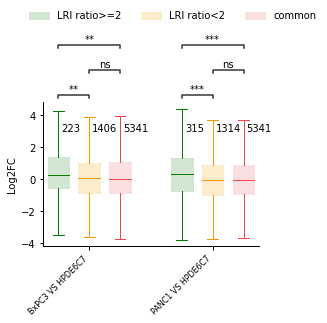

In [85]:
#plt.close()
import seaborn as sns
from statannotations.Annotator import Annotator
import os
import pandas as pd
import numpy as np
import argparse
import re,sys,os,math,gc
#plot module
import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.rcParams.update({'figure.max_open_warning': 100})
plt.style.use('seaborn-colorblind')
mpl.rcParams['ytick.direction'] = 'out'

#可P
import matplotlib as mpl
mpl.rcParams['pdf.fonttype']=42
mpl.rcParams['ps.fonttype']=42

from bx.intervals.intersection import Intersecter, Interval
def match_interval(df,dfg,chr_list):
    interval_dic={}
    for i in chr_list:
        interval=Intersecter()
        interval_dic[i]=interval
        dfs=df[df['chrs']==i]
        dfs=dfs.reset_index(drop=True)
        for j in range(len(dfs)):
            interval.add_interval(Interval(dfs['start'][j], dfs['end'][j]))
    lists=[]
    for i in chr_list:
        index=[]
        dfgs=dfg[dfg['chrs']==i]
        dfgs=dfgs.reset_index(drop=True)
        for j in range(len(dfgs)):
            x=interval_dic[i].find(dfgs['start'][j],dfgs['end'][j])
            if len(x)>0:
                index.append(j)
        dfos=dfgs.loc[index,:]
        lists.append(dfos)
    dfo=pd.concat(lists)
    return dfo 

os.chdir('/annoroad/胰腺癌/')
dfa=pd.read_table('CDB.venn.xls',sep='\t')
lri=pd.read_table('CDB.xls',sep='\t')
lri=lri.loc[:,['chrs','start','end','BxPC3_LRI', 'PANC1_LRI', 'HPDE6C7_LRI']]
df=dfa[(dfa['BxPC3']==1) & (dfa['PANC1']==1) & (dfa['HPDE6C7']==0)]
dfs=pd.merge(df,lri,how='inner',on=['chrs','start','end'])
df1=dfs[(dfs['BxPC3_LRI']/dfs['HPDE6C7_LRI'])>=2]
df2=dfs[(dfs['PANC1_LRI']/dfs['HPDE6C7_LRI'])>=2]
gene=pd.read_table('tumor_all_log2.xls',sep='\t')
chr_list=['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9','chr10','chr11','chr12','chr13','chr14','chr15','chr16','chr17','chr18','chr19','chr20','chr21','chr22','chrX']
df=df.reset_index(drop=True)
dfso=match_interval(dfs,gene,chr_list)
dfo11=match_interval(df1,gene,chr_list)
dfo12=match_interval(df2,gene,chr_list)
dfo21=pd.concat([dfso,dfo11])
dfo22=pd.concat([dfso,dfo12])
dfo21=dfo21.drop_duplicates(subset='GeneName',keep=False)
dfo22=dfo22.drop_duplicates(subset='GeneName',keep=False)

#dfo2=dfo2.drop_duplicates(subset='GeneName',keep=False)
df=dfa[(dfa['BxPC3']==1) & (dfa['PANC1']==1) & (dfa['HPDE6C7']==1)]
df=df.reset_index(drop=True)
dfo3=match_interval(df,gene,chr_list)
datalist=[dfo11['BxPC3_log2FC'],dfo21['BxPC3_log2FC'],dfo3['BxPC3_log2FC'],dfo12['PANC1_log2FC'],dfo22['PANC1_log2FC'],dfo3['PANC1_log2FC']]
#draw_ratio(['BxPC3 VS HPDE6C7','PANC1 VS HPDE6C7'],datalist,'SpBd_gene2','Log2FC')
sams=['BxPC3_LRI','BxPC3_sp','BxPC3_common','PANC1_LRI','PANC1_sp','PANC1_common']

dfk=[]
x=0
for i in datalist:
    sam=[sams[x]]*len(i)
    dfu=pd.DataFrame({'sample':sam,'data':list(i)})
    dfk.append(dfu)
    x+=1
dfks=pd.concat(dfk)
test=pd.DataFrame({'sample':['x'],'data':[0]})
dfks=pd.concat([dfks,test])

fig = plt.figure(figsize=(5,5))
axes = fig.add_axes([0.15,0.2,0.6,0.4])
axes.set_ylabel('Log2FC')
tick_list=[1,5]
medianprops = dict(linestyle='-', linewidth=1, color='black')
boxprops = dict(linestyle='-', linewidth=1, color='black')



bplot = axes.boxplot(datalist, showfliers=False, patch_artist=True, widths=0.7, vert=True, positions=[0,1,2,4,5,6],medianprops=medianprops, boxprops=boxprops)
color_list2=['#007E00','#F49800','#ED4949','#007E00','#F49800','#ED4949']
color_list=['#D3E6D2','#FCECCC','#FBE0E1','#D3E6D2','#FCECCC','#FBE0E1']
#color_list=['#D3E6D2']*100
bbox_list=[]
position=[0,1,2,4,5,6]
for  i in range(len(datalist)):
    x=position[i]
    medianprops = dict(linestyle='-', linewidth=1, color=color_list2[i])
    boxprops = dict(linestyle='-', linewidth=1, color=color_list2[i])
    whiskerprops = dict(color=color_list2[i], linewidth=1,linestyle='-')
    capprops =dict(color=color_list2[i], linewidth=1,linestyle='-')
    bplot=axes.boxplot(datalist[i], showfliers=False, patch_artist=True, widths=0.7, vert=True, positions=[x],medianprops=medianprops, boxprops=boxprops,whiskerprops=whiskerprops,capprops=capprops)
    patch =bplot['boxes'][0]
    patch.set(facecolor=color_list[i], alpha=1)
    patch.set(edgecolor=color_list[i], linewidth=1)
    bbox_list.append(bplot["boxes"][0])

axes.spines['bottom'].set_linewidth(1)
axes.spines['left'].set_linewidth(1)
axes.spines['right'].set_linewidth(0)
axes.spines['top'].set_linewidth(0)
axes.tick_params(top=False,right=False,width=1,colors='black',direction='out')
axes.set_xticks(tick_list)
axes.set_xticklabels(['BxPC3 VS HPDE6C7','PANC1 VS HPDE6C7'],rotation=45,fontsize=8,ha="right")
axes.legend([bbox_list[0],bbox_list[1],bbox_list[2]],['LRI ratio>=2','LRI ratio<2','common'],bbox_to_anchor=(0.6, 1.7),frameon=False,loc='upper center',ncol=3)

pairs=[('BxPC3_LRI','BxPC3_sp'), ('BxPC3_sp','BxPC3_common'), ('BxPC3_LRI','BxPC3_common'),('PANC1_LRI','PANC1_sp'), ('PANC1_sp','PANC1_common'), ('PANC1_LRI','PANC1_common')]

annotator = Annotator(axes, pairs, data=dfks, x='sample', y='data', order=['BxPC3_LRI','BxPC3_sp','BxPC3_common','x','PANC1_LRI','PANC1_sp','PANC1_common'])
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()
z=0
for i in datalist:
    if z>2:
        axes.text(z+1.1,3,str(len(i)))
    else:
        axes.text(z+.1,3,str(len(i)))
    z+=1
plt.savefig('Fig2.pdf')

In [54]:
print(len(dfo),len(dfo2),len(dfo3))

153 1270 5341


In [1]:
print ('')

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

BxPC3_sp vs. BxPC3_common: Mann-Whitney-Wilcoxon test two-sided, P_val:3.586e-01 U_stat=4.416e+06
PANC1_sp vs. PANC1_common: Mann-Whitney-Wilcoxon test two-sided, P_val:3.612e-01 U_stat=4.415e+06


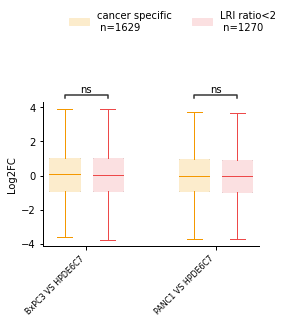

In [75]:
#plt.close()
import seaborn as sns
from statannotations.Annotator import Annotator
import os
import pandas as pd
import numpy as np
import argparse
import re,sys,os,math,gc
#plot module
import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.rcParams.update({'figure.max_open_warning': 100})
plt.style.use('seaborn-colorblind')
mpl.rcParams['ytick.direction'] = 'out'

#可P
import matplotlib as mpl
mpl.rcParams['pdf.fonttype']=42
mpl.rcParams['ps.fonttype']=42

from bx.intervals.intersection import Intersecter, Interval
def match_interval(df,dfg,chr_list):
    interval_dic={}
    for i in chr_list:
        interval=Intersecter()
        interval_dic[i]=interval
        dfs=df[df['chrs']==i]
        dfs=dfs.reset_index(drop=True)
        for j in range(len(dfs)):
            interval.add_interval(Interval(dfs['start'][j], dfs['end'][j]))
    lists=[]
    for i in chr_list:
        index=[]
        dfgs=dfg[dfg['chrs']==i]
        dfgs=dfgs.reset_index(drop=True)
        for j in range(len(dfgs)):
            x=interval_dic[i].find(dfgs['start'][j],dfgs['end'][j])
            if len(x)>0:
                index.append(j)
        dfos=dfgs.loc[index,:]
        lists.append(dfos)
    dfo=pd.concat(lists)
    return dfo 

os.chdir('/annoroad/胰腺癌/')
dfa=pd.read_table('CDB.venn.xls',sep='\t')
lri=pd.read_table('CDB.xls',sep='\t')
lri=lri.loc[:,['chrs','start','end','BxPC3_LRI', 'PANC1_LRI', 'HPDE6C7_LRI']]
df=dfa[(dfa['BxPC3']==1) & (dfa['PANC1']==1) & (dfa['HPDE6C7']==0)]
dfs=pd.merge(df,lri,how='inner',on=['chrs','start','end'])
df=dfs[((dfs['PANC1_LRI']/dfs['HPDE6C7_LRI'])>=2) & ((dfs['BxPC3_LRI']/dfs['HPDE6C7_LRI'])>=2)]
gene=pd.read_table('tumor_all_log2.xls',sep='\t')
chr_list=['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9','chr10','chr11','chr12','chr13','chr14','chr15','chr16','chr17','chr18','chr19','chr20','chr21','chr22','chrX']
df=df.reset_index(drop=True)
dfo=match_interval(df,gene,chr_list)
#dfo.to_csv('cancerBDgene.xls',sep='\t',index=False)
df=dfs[((dfs['PANC1_LRI']/dfs['HPDE6C7_LRI'])<2) & ((dfs['BxPC3_LRI']/dfs['HPDE6C7_LRI'])<2)]
dfo2=match_interval(dfs,gene,chr_list)

#dfo2=dfo2.drop_duplicates(subset='GeneName',keep=False)
df=dfa[(dfa['BxPC3']==1) & (dfa['PANC1']==1) & (dfa['HPDE6C7']==1)]
df=df.reset_index(drop=True)
dfo3=match_interval(df,gene,chr_list)
datalist=[dfo2['BxPC3_log2FC'],dfo3['BxPC3_log2FC'],dfo2['PANC1_log2FC'],dfo3['PANC1_log2FC']]
#draw_ratio(['BxPC3 VS HPDE6C7','PANC1 VS HPDE6C7'],datalist,'SpBd_gene2','Log2FC')
sams=['BxPC3_sp','BxPC3_common','PANC1_sp','PANC1_common']

dfk=[]
x=0
for i in datalist:
    sam=[sams[x]]*len(i)
    dfu=pd.DataFrame({'sample':sam,'data':list(i)})
    dfk.append(dfu)
    x+=1
dfks=pd.concat(dfk)
test=pd.DataFrame({'sample':['x'],'data':[0]})
dfks=pd.concat([dfks,test])

fig = plt.figure(figsize=(5,5))
axes = fig.add_axes([0.15,0.2,0.6,0.4])
axes.set_ylabel('Log2FC')
tick_list=[0.5,3.5]
medianprops = dict(linestyle='-', linewidth=1, color='black')
boxprops = dict(linestyle='-', linewidth=1, color='black')


bplot = axes.boxplot(datalist, showfliers=False, patch_artist=True, widths=0.7, vert=True, positions=[0,1,3,4],medianprops=medianprops, boxprops=boxprops)

color_list2=['#F49800','#ED4949','#F49800','#ED4949']
color_list=['#FCECCC','#FBE0E1','#FCECCC','#FBE0E1']
#color_list=['#D3E6D2']*100
bbox_list=[]

position=[0,1,3,4]
for  i in range(len(datalist)):
    x=position[i]
    medianprops = dict(linestyle='-', linewidth=1, color=color_list2[i])
    boxprops = dict(linestyle='-', linewidth=1, color=color_list2[i])
    whiskerprops = dict(color=color_list2[i], linewidth=1,linestyle='-')
    capprops =dict(color=color_list2[i], linewidth=1,linestyle='-')
    bplot=axes.boxplot(datalist[i], showfliers=False, patch_artist=True, widths=0.7, vert=True, positions=[x],medianprops=medianprops, boxprops=boxprops,whiskerprops=whiskerprops,capprops=capprops)
    patch =bplot['boxes'][0]
    patch.set(facecolor=color_list[i], alpha=1)
    patch.set(edgecolor=color_list[i], linewidth=1)
    bbox_list.append(bplot["boxes"][0])

axes.spines['bottom'].set_linewidth(1)
axes.spines['left'].set_linewidth(1)
axes.spines['right'].set_linewidth(0)
axes.spines['top'].set_linewidth(0)
axes.tick_params(top=False,right=False,width=1,colors='black',direction='out')
axes.set_xticks(tick_list)
axes.set_xticklabels(['BxPC3 VS HPDE6C7','PANC1 VS HPDE6C7'],rotation=45,fontsize=8,ha="right")
axes.legend([bbox_list[0],bbox_list[1]],['cancer specific\n n=1629','LRI ratio<2\n n=1270','common\n n=5341'],bbox_to_anchor=(0.6, 1.7),frameon=False,loc='upper center',ncol=3)

pairs=[('BxPC3_sp','BxPC3_common'), ('PANC1_sp','PANC1_common')]

annotator = Annotator(axes, pairs, data=dfks, x='sample', y='data', order=['BxPC3_sp','BxPC3_common','x','PANC1_sp','PANC1_common'])
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()
plt.savefig('Fig2p.pdf')


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

BxPC3_EP vs. BxPC3_nonEP: Mann-Whitney-Wilcoxon test two-sided, P_val:1.781e-06 U_stat=1.271e+06
PANC1_EP vs. PANC1_nonEP: Mann-Whitney-Wilcoxon test two-sided, P_val:3.388e-07 U_stat=3.412e+05


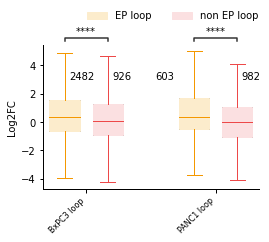

In [7]:
#plt.close()
import seaborn as sns
from statannotations.Annotator import Annotator
import os
import pandas as pd
import numpy as np
import argparse
import re,sys,os,math,gc
#plot module
import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.rcParams.update({'figure.max_open_warning': 100})
plt.style.use('seaborn-colorblind')
mpl.rcParams['ytick.direction'] = 'out'

#可P
import matplotlib as mpl
mpl.rcParams['pdf.fonttype']=42
mpl.rcParams['ps.fonttype']=42

samples=['BxPC3','PANC1']
group=['_epgene.xls','_nepgene.xls']
datalist=[]
for i in samples:
    for j in group:
        df=pd.read_table(i+j,sep='\t')
        datalist.append(df['{}_log2FC'.format(i)])
sams=['BxPC3_EP','BxPC3_nonEP', 'PANC1_EP','PANC1_nonEP']       
dfk=[]
x=0
for i in datalist:
    sam=[sams[x]]*len(i)
    dfu=pd.DataFrame({'sample':sam,'data':list(i)})
    dfk.append(dfu)
    x+=1
dfks=pd.concat(dfk)
test=pd.DataFrame({'sample':['x'],'data':[0]})
dfks=pd.concat([dfks,test])

fig = plt.figure(figsize=(5,5))
axes = fig.add_axes([0.15,0.2,0.6,0.4])
axes.set_ylabel('Log2FC')
tick_list=[0.5,3.5]
medianprops = dict(linestyle='-', linewidth=1, color='black')
boxprops = dict(linestyle='-', linewidth=1, color='black')


bplot = axes.boxplot(datalist, showfliers=False, patch_artist=True, widths=0.7, vert=True, positions=[0,1,3,4],medianprops=medianprops, boxprops=boxprops)

color_list2=['#F49800','#ED4949','#F49800','#ED4949']
color_list=['#FCECCC','#FBE0E1','#FCECCC','#FBE0E1']
#color_list=['#D3E6D2']*100
bbox_list=[]

position=[0,1,3,4]
for  i in range(len(datalist)):
    x=position[i]
    medianprops = dict(linestyle='-', linewidth=1, color=color_list2[i])
    boxprops = dict(linestyle='-', linewidth=1, color=color_list2[i])
    whiskerprops = dict(color=color_list2[i], linewidth=1,linestyle='-')
    capprops =dict(color=color_list2[i], linewidth=1,linestyle='-')
    bplot=axes.boxplot(datalist[i], showfliers=False, patch_artist=True, widths=0.7, vert=True, positions=[x],medianprops=medianprops, boxprops=boxprops,whiskerprops=whiskerprops,capprops=capprops)
    patch =bplot['boxes'][0]
    patch.set(facecolor=color_list[i], alpha=1)
    patch.set(edgecolor=color_list[i], linewidth=1)
    bbox_list.append(bplot["boxes"][0])

axes.spines['bottom'].set_linewidth(1)
axes.spines['left'].set_linewidth(1)
axes.spines['right'].set_linewidth(0)
axes.spines['top'].set_linewidth(0)
axes.tick_params(top=False,right=False,width=1,colors='black',direction='out')
axes.set_xticks(tick_list)
axes.set_xticklabels(['BxPC3 loop','PANC1 loop'],rotation=45,fontsize=8,ha="right")
axes.legend([bbox_list[0],bbox_list[1]],['EP loop','non EP loop'],bbox_to_anchor=(0.6, 1.3),frameon=False,loc='upper center',ncol=2)

pairs=[('BxPC3_EP','BxPC3_nonEP'), ('PANC1_EP','PANC1_nonEP')]

annotator = Annotator(axes, pairs, data=dfks, x='sample', y='data', order=['BxPC3_EP','BxPC3_nonEP','x', 'PANC1_EP','PANC1_nonEP'])
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()
z=0
for i in datalist:
    if z>2:
        axes.text(z+1.1,3,str(len(i)))
    else:
        axes.text(z+.1,3,str(len(i)))
    z+=1
plt.savefig('loop_compare.pdf')
